<a id='Top'></a>

## Preprocess and Modelling

### <u>Summary :</u>
[1. Pre-process and Quick Exploration](#sect_1)

[2. Train-Test Split and Scaling](#sect_2)

[3. Modelling](#sect_3)

&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Logistic Regression](#sect_3.1)

&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Decision Tree](#sect_3.2)

&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Naive Bayes BeronoulliNB](#sect_3.3)
    
&nbsp;&nbsp;&nbsp;&nbsp;[3.4 XGBoost](#sect_3.4)
    
&nbsp;&nbsp;&nbsp;&nbsp;[3.5 TensorFlow](#sect_3.5)

[4. Hyperparameter tuning](#sect_4)
   
[5. Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)](#sect_5)

[6. Conclusion](#sect_6)


In [1]:
#  Import the required libraries
import numpy as np
import pandas as pd

#  Set the maximum column display
pd.set_option('display.max_columns', 50)

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<a id='sect_1'></a>

### 1. Pre-processing and Quick Exploration
- On the **1st feature analysis** <u>the result are unusual and does not make any sense.</u>
- 
**We'll recheck the raw data again, features and attributes** <u>and do further analysis what needs to be corrected.</u>

- **Correlation**

In [2]:
# Reading in the cleaned csv. The 'skipintialspace' remove all the whitespaces during reading the csv.
# For this I choose to get 3 million rows.
df = pd.read_csv('data/US_Accidents_March23.csv', index_col=0, skipinitialspace=True, nrows=3_000_000 )

In [3]:
# Check the DataFrame 
df.head(3)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [4]:
# Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, A-1 to A-3009878
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Country                object 
 16  Timezone               object 
 17  Airport_Code           object 
 18  Weather_Timestamp      object 
 19  Temperature(F)         float64
 20  Wind_Chill(F)          float64
 21  Humidity(%)            float64
 22  Pressure(in)       

In [5]:
# Check the total of the null rows
df.isna().sum()

Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3000000
End_Lng                  3000000
Distance(mi)                   0
Description                    5
Street                      1712
City                          56
County                         0
State                          0
Zipcode                      412
Country                        0
Timezone                    2380
Airport_Code                5631
Weather_Timestamp          34172
Temperature(F)             49294
Wind_Chill(F)            1134852
Humidity(%)                52968
Pressure(in)               41365
Visibility(mi)             56015
Wind_Direction             48501
Wind_Speed(mph)           278651
Precipitation(in)        1225273
Weather_Condition          55200
Amenity                        0
Bump                           0
Crossing  

There are features that has alot of missing or null values.

This will be handled on dropping the columns rather than the dropna panda function.

Below are the list of all features in the data set. 

As the purpose of this **analysis is to start simple;** <u>if a street feature can predict a severity rating.</u> 

**And dropping features like Start_Time, Street and Zipcode** <u>seems not be a predictor of severity rating.</u>

**However, weather conditions and alike could affect severity;** <u>but I choose at this moment not to include them.</u>

In [6]:
drop_cols = [
 'Source',
 # 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 # 'Amenity',
 # 'Bump',
 # 'Crossing',
 # 'Give_Way',
 # 'Junction',
 # 'No_Exit',
 # 'Railway',
 # 'Roundabout',
 # 'Station',
 # 'Stop',
 # 'Traffic_Calming',
 # 'Traffic_Signal',
 # 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'
 ]

In [7]:
# Drop the columns specified on the drop_cols list and tell pandas axis=1 as columns (not rows)
df.drop(drop_cols,axis=1, inplace=True)

# Another alternative to the inplace argument!
# df = df.drop(drop_cols,axis=1).copy()

In [8]:
# Re-check the total of the null rows. Sanity check!
df.isna().sum()

Severity           0
Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

The null row are now removed and next is to look again what are the data types.

In [9]:
# Re-check the data types of each remaining features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, A-1 to A-3009878
Data columns (total 14 columns):
 #   Column           Dtype
---  ------           -----
 0   Severity         int64
 1   Amenity          bool 
 2   Bump             bool 
 3   Crossing         bool 
 4   Give_Way         bool 
 5   Junction         bool 
 6   No_Exit          bool 
 7   Railway          bool 
 8   Roundabout       bool 
 9   Station          bool 
 10  Stop             bool 
 11  Traffic_Calming  bool 
 12  Traffic_Signal   bool 
 13  Turning_Loop     bool 
dtypes: bool(13), int64(1)
memory usage: 83.0+ MB


In [10]:
# Visually look at the DataFrame of the top 3
df.head(3)

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
ID,,,,,,,,,,,,,,
A-1,3,False,False,False,False,False,False,False,False,False,False,False,False,False
A-2,2,False,False,False,False,False,False,False,False,False,False,False,False,False
A-3,2,False,False,False,False,False,False,False,False,False,False,False,True,False


As seen in above the remaining features (independent features), excluding the **target feature ('Severity')**, <u>are boolean (True / False).</u>

Therefore, we need **to change it to something that a machine can read.**

- Converting the boolean columns in the data frame by using the pandas library **pd.get_dummies**.
- I treated the said columns **as categories to be converted into a variable as many 0/1 variables.**
- **The columns in the output are each named after a value;** if the input is a DataFrame, the name of the original variable is prepended to the value.

**Parameters :**
- **prefix_sep** - Appending prefix, **separator/delimiter to use. e.g "Amenity_True"**
- **dummy_na** - Add a column to **indicate NaNs, if False NaNs are ignored.**
- **dtype** - Data type for new columns. Only a **single dtype is allowed.**
- **sparse** - Whether the dummy-encoded columns **should be backed by a SparseArray (True) or a regular NumPy array (False).**
- **drop_first** - Whether to **get k-1 dummies out of k categorical levels** <u>by removing the first level.</u>. Preventing the **dummy variable trap, reduce extra column and created correlation**

**Note:** Even though most of the parameter listed above, except for the dtype, are by default, I rather want to be explict if I need to go back.

In [11]:
# Transform the boolean columns to variables 0/1 by pandas get_dummies
dummy_df = pd.get_dummies(
    data=df, 
    columns=[
             # 'Severity',
             'Amenity',
             'Bump',
             'Crossing',
             'Give_Way',
             'Junction',
             'No_Exit',
             'Railway',
             'Roundabout',
             'Station',
             'Stop',
             'Traffic_Calming',
             'Traffic_Signal',
             'Turning_Loop'
            ],
    prefix_sep='_',
    dummy_na=False, 
    dtype='int', 
    sparse=False, 
    drop_first=True, 
)

# View the transformed DataFrame (only a portion)
print(dummy_df[0:5])

     Severity  Amenity_True  Bump_True  Crossing_True  Give_Way_True  \
ID                                                                     
A-1         3             0          0              0              0   
A-2         2             0          0              0              0   
A-3         2             0          0              0              0   
A-4         3             0          0              0              0   
A-5         2             0          0              0              0   

     Junction_True  No_Exit_True  Railway_True  Roundabout_True  Station_True  \
ID                                                                              
A-1              0             0             0                0             0   
A-2              0             0             0                0             0   
A-3              0             0             0                0             0   
A-4              0             0             0                0             0   
A-5      

Looking at the slice of the dummy_df the column named with the specified prefix separator "-" and boolean converted to 0 or 1.

Next is look at the shape of it.

In [12]:
# dummy_df.shape
# Print out the shape after get pd.get_dummies
print(f'''After the transformation of pd.get_dummies:
Number of rows    : {dummy_df.shape[0]:,} 
Number of columns : {dummy_df.shape[1]}
''')

After the transformation of pd.get_dummies:
Number of rows    : 3,000,000 
Number of columns : 13



In [13]:
# Re-check info if all features are numerical
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, A-1 to A-3009878
Data columns (total 13 columns):
 #   Column                Dtype
---  ------                -----
 0   Severity              int64
 1   Amenity_True          int32
 2   Bump_True             int32
 3   Crossing_True         int32
 4   Give_Way_True         int32
 5   Junction_True         int32
 6   No_Exit_True          int32
 7   Railway_True          int32
 8   Roundabout_True       int32
 9   Station_True          int32
 10  Stop_True             int32
 11  Traffic_Calming_True  int32
 12  Traffic_Signal_True   int32
dtypes: int32(12), int64(1)
memory usage: 183.1+ MB


The **target and independent features** now converted to numerical data.

In [14]:
# Counts of each severity rating
dummy_df['Severity'].value_counts()

Severity
2    1953486
3     993392
1      39028
4      14094
Name: count, dtype: int64

<Axes: title={'center': 'Severity Rating'}>

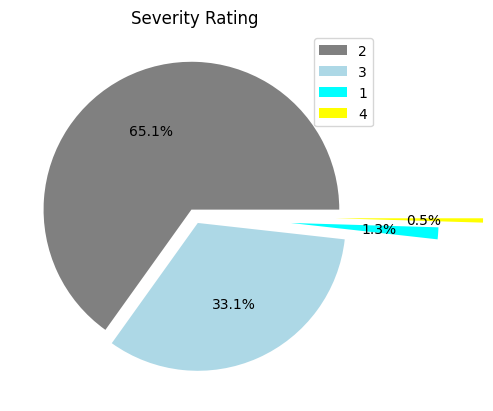

In [15]:
# Assign colors for the severity ranking
colors = ['grey','lightblue','cyan','yellow']

# Percent of each severity rating in a Pie chart
dummy_df['Severity'].value_counts()\
                    .plot(kind="pie",
                          autopct='%1.1f%%', 
                          shadow=False, 
                          # Slice out each pie section
                          explode=[0.05, 0.05, 0.65, 0.95], 
                          colors=colors, 
                          legend=True, 
                          title='Severity Rating',
                          ylabel='', 
                          labeldistance=None
                         )

As seen on the **value counts** <u>there is a **huge imbalanced of data** and are not equally distributed.</u>

**It is more evident when plotted in a pie chart.**

Out of the 3 million the percentage of each 

**Severity:**
- **2** - 65%
- **3** - 33%
- **1** - 1.3%
- **4** - 0.5%

Whenever the **target classess of classification** <u>are not equally distributed it is called</u> **imbalanced data.**

The results in models **could have good predictive performance on the majority class but poor performance for the minority class.**

Further on my research is that <u>it is a highly common problem in machine learning and it vary from</u> **slight bias to a severe imbalance**.

Also in my research that **most machine learning algorithms used for classification** <u>was designed around the assumption of **equal number of examples for each class.**</u>

We will try to address this imbalance in the modelling as some algorithms has some capability to handle this.

In [16]:
# See the correlation of each features
corr_df = dummy_df.corr(numeric_only=True)

# Apply style gradient for ease differentiating values
corr_df.style.background_gradient(cmap='pink')

,Severity,Amenity_True,Bump_True,Crossing_True,Give_Way_True,Junction_True,No_Exit_True,Railway_True,Roundabout_True,Station_True,Stop_True,Traffic_Calming_True,Traffic_Signal_True
Severity,1.000000,-0.068114,-0.004379,-0.219185,-0.026285,0.109541,-0.020993,-0.024669,-0.003576,-0.079362,-0.105150,-0.006475,-0.267218
Amenity_True,-0.068114,1.000000,0.006541,0.155195,0.006419,-0.022942,0.014838,0.052240,-0.000253,0.178603,0.038092,0.038065,0.107037
Bump_True,-0.004379,0.006541,1.000000,0.009678,0.000364,-0.003913,0.032781,-0.001576,-0.000117,0.002079,0.016130,0.614765,-0.004223
Crossing_True,-0.219185,0.155195,0.009678,1.000000,0.060128,-0.082775,0.068149,0.172381,0.000589,0.166216,0.095734,0.038355,0.495628
Give_Way_True,-0.026285,0.006419,0.000364,0.060128,1.000000,-0.012045,0.009010,0.001995,-0.000485,-0.003888,0.023910,0.003916,0.075156
Junction_True,0.109541,-0.022942,-0.003913,-0.082775,-0.012045,1.000000,-0.006641,-0.007266,0.016843,-0.029979,-0.031313,-0.003749,-0.108760
No_Exit_True,-0.020993,0.014838,0.032781,0.068149,0.009010,-0.006641,1.000000,0.004956,-0.000313,0.015518,0.025807,0.021794,0.034011
Railway_True,-0.024669,0.052240,-0.001576,0.172381,0.001995,-0.007266,0.004956,1.000000,-0.000597,0.137596,0.005990,0.002997,0.058253
Roundabout_True,-0.003576,-0.000253,-0.000117,0.000589,-0.000485,0.016843,-0.000313,-0.000597,1.000000,-0.000642,0.002374,0.003311,-0.003045
Station_True,-0.079362,0.178603,0.002079,0.166216,-0.003888,-0.029979,0.015518,0.137596,-0.000642,1.000000,0.032883,0.008897,0.134260


The Severity (target) feature has a negative correlation except for the Junction_True

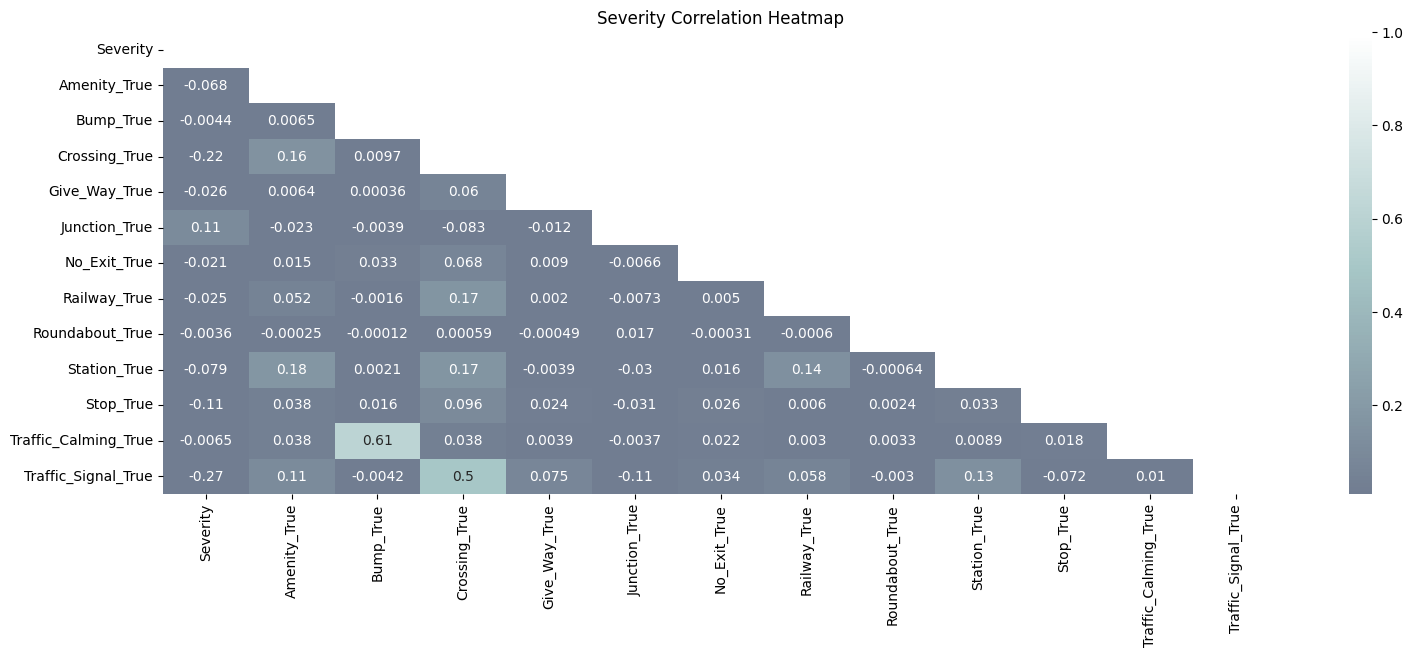

In [17]:
# Set the figure size of the heat plot
plt.figure(figsize=(18, 6))

# Mask use to filter out the redundant info
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Visual the data using a heatmap
sns.heatmap(corr_df, mask=mask, annot=True,vmax=1, vmin=0.01, center=0, cmap="bone")

# Set the title for Severity Heatmap
plt.title('Severity Correlation Heatmap')

# Show the correlation heatmap
plt.show()

**Correlation or dependence**, in statistic, refers to a degree that any pair of variables are linearly related.

The **Traffic_Calming_True and Bump_True** <u>has **0.61** correlation.</u> Second is the **Traffic_Signal_True and Crossing_True** <u>at **0.5** correlation.</u>

Since it is **not nearly close to 1 (perfect correlation)** <u>I did not drop it.</u>

The **best predictor** (independent) variable <u>correlates highly with the target (dependent) variable but slightly or minimally with each independent variables.</u>

If such fitted to a model will produce often called **"low noise"** <u>and statistically robust.</u>

That it will **predict better or reliably** <u>across multiples samples of **variable set drawn from the same statistical population**.</u>


[Back to top](#Top)

<a id='sect_2'></a>

### 2. Train-Test Split and Scaling

The **train test split** is a method to evaluate a machine learning model that has the ability to predict certain outcomes as accurately as possible.

We will use the **sklearn train_test_split** that will <u>help split the data set into **training and test subset.**</u>


Also we are **performing feature scaling** <u>which is a technique to standardize the independent feature available in the data in a fixed range.</u>

**It helps normalize the range of independent variables or features** and <u>prevent features with large range value from causing dominating or biases in the models.</u>

Also **unscaled data** <u>can also slow down or even prevent the convergence of many **gradient-based estimators.**</u>



For the **scaling there are two prominent types** in **sklearn**. These are the:

- **StandardScaler** - removes the mean and scales the data to unit variance
- **MinMaxScaler** - rescales the data set such that all feature values are in the range [0, 1]

 ##### Reference:
  
  [sklearn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

  [sklearn MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

  Below is the **process** of <u>applying the **Train-Test Split and Scaler**.</u>

**1. Train-Test Split**

**2. Pre-process**

    2.1. Fit scaler on train data.
    
    2.2. Transform train data.
    
    2.3. Transform test data using the same scaler.
    
**3. Train model on scaled train data**

**4. Test model on scaled test data**

**Testing data** <u>should represent real-world data.</u> **Feature normalization** <u>works is to center and normalise data by substracting the mean and dividing the variance.</u>
If we did take the **mean and variance of the complete or scaled data** <u>before the train-test split **it will be introducing future information(data leakage) into the data training set**.</u>

**Thus it is advisable to perform feature normalisation separately** <u>on the training and testing (**step 2.2 - 2.3**).</u> Using its own **mean and variance** and can test and evaluate whether **a model can generalize well to unseen data.**




In [18]:
# Import the sklearn to split data set into training and test subset
from sklearn.model_selection import train_test_split

# Import the StandardScaler 
from sklearn.preprocessing import StandardScaler

In [19]:
# Define the X and y 
# Set features variable (Independent) and dropping target (dependent)
X = dummy_df.drop(columns=['Severity'])

# Assign the target variable (dependent)
y = dummy_df['Severity']

<!-- # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=True, random_state=42, stratify=y  )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y, )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=None ) -->

In [20]:
# 1. Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=None )

# 2. Instantiate the scaler 
scaler = StandardScaler()

# 3. Fit the scaler 
scaler.fit(X_train) #Pre-process step 2.1

# 4. Transform the both the X_train and X_train with the fitted scaler 
X_train_scaled = scaler.transform(X_train) # Pre-process step 2.2
X_test_scaled  = scaler.transform(X_test) # Pre-process step 2.3

**Train_Test_Split Parameter**
- **test_size** - Proportion of the data set to include the test split. **Choosen 20% test and the train will be implicit at 80%.**
- **shuffle** - Whether or not to shuffle the data before applying the split. **I set it "True" to make a good generalization performance of the model.**
- **random_state** - Controls the shuffling applied to data for reproducible output across multiple function calls.
- **stratify** - By meaning is act of sorting. And stratified sampling is considered a best choice among the probability sampling methods.

    For example if assign a binary categorical variable of values 0 and 1 and 25% of zero (0) and 75%    (1) this will make sure the random split has 25% of zero(0) and 75% of one(1)
        

**Unfortunately there is <u>no such clear guideline or standard for an optimal split percentage.</u>**

What is the **common split** <u>I noticed are **70/30, 80/20 and 50/50.**</u> But different opinion will be **depending on the project objectives, quality and size of the dataset.**.

If the data set is very large, for example 500,000 - 1,000,000 samples <u>some split it by 98/2.</u>

Their rationale is if distribution is the same; <u>even 2% is a large number and still big enough testing size to possibly give a good predictive result.</u>
That's according to my research.

**However, I choose the 80/20 split and put the test_size=0.2.**


Also in the parameters like **random_state and shuffle** there is no guide or standard. 

I choose to **set the shuffle to "True"** <u>becuase without splitting ordered data, it could lead to one set having only certain types of data and the other set only other types of data.</u>

With regards to **random_state**, it <u>can make a big difference in any **classification or regression prediction.**</u> 
So how many times I execute the code, the result will be the same. 

**The value I have chosen is 42** <u>which is the common I seen in other train-test split.</u> 

**As general advise** <u>it is recommended to use a fixed value (like 42 or any number) when comparing algorithm **so each model is evaluated on the same splits of the training data set**.</u>


[Back to top](#Top)

<a id='sect_3'></a>

### 3. Modelling

The **data set has 4 target classes (Severity 1, 2, 3, 4)** <u>and any data set that has more than 2 are considered multiclass.</u> And the **target values are discrete.**

Now we will try and test some common algorithm

- **LogisticRegression**
- **Decision Tree**
- **Naive Bayes**
- **XGBoost**
- **TensorFlow**

**The standard steps to be taken include:**

- Fitting the model with our training data.

- Check the model stability, using k-fold cross validation on the training data.

- Use the fitted model to make prediction.

- Evaluate the model prediction by comparing the predicted classes and the true labels.

<a id='sect_3.1'></a>

#### 3.1 Logistic Regression

**Logistic regression** is a relatively simple algorithm that is easy to understand and interpret. It can provide insights into the relationship between the independent variables and the probability of a particular outcome.

**Reason of choosing are the following:** 
- Aside from being simple; it can provide insights into the relationship between the independent variables and the probability of a particular outcome.
- Can be trained quickly even with large data set and less computationally expensive than complex models like neural networks.
- Can handle noise in the input data and is less prone to overfitting compared to other machine learning algorithms.

**Some known Disadvantage or limitation**:
- Non-linear problems can’t be solved
- Needs that independent variables are linearly related to the log odds

In [21]:
# Import the libraries 
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the LinearRegression
logistic_model = LogisticRegression(penalty='l1',
                                    C=1, 
                                    max_iter=1_000, 
                                    solver='saga', 
                                    multi_class='multinomial'
                                   )

# Check if properly instatiated and proper estimator are established
logistic_model

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')

**Parameter selection**

- **C**  
  **Inverse of regularization strength.** Used the default value 1.

- **max_iter**
  
  **Maximum number of iteration**. Random picked 1,000
  
- **penalty**  
  **Regularization techniques** used in machine learning to prevent overfitting.( **l1-Lasso Regression** / l2 -Ridge Regression )

- **multi_class**  
  **Is a strategy for handling multiclass classification.** I choose the **multinomial** which is a **classification method** <u>that generalizes **logistic regression to multiclass problems,**</u> i.e. with more than two possible discrete outcomes.

- **solver**  
   **Algorithm to use in the optimization problem.** I choose the **saga** because it is **fast when the number of samples is significantly larger than the number of features** and is able to **finely optimize non-smooth objective and works in the case of l1 (Lasso) penalty.** [1.1.11.3. Solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

**Reference:**
  [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  

In [22]:
# 2. Fit the model 
logistic_model.fit(X_train_scaled, y_train)

# 3. Print score
# train data score
print(f'Logistic model train score is {(logistic_model.score(X_train_scaled, y_train)*100):0.2f} %')

# test data score
print(f'Logistic model test score is  {(logistic_model.score(X_test_scaled, y_test)*100):0.2f} %')

Logistic model train score is 65.81 %
Logistic model test score is  65.77 %


[Back to top](#Top)

<a id='sect_3.2'></a>

#### 3.2 Decision Tree

**Decision Tree** are a non-parametric supervised learning method used for classification and regression. It is a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

**Reason of choosing are the following:** 

- Simple to understand and interpret and can be visualized.
- Requires little data preparation. Do not require feature scaling.
- Able to handle multi-output problems.
  

**Some known Disadvantage or limitation**:
- Can create over-complex trees that do not generalize the data well (overfitting the data)
- Can be unstable because small variation in the data could result in a completely different tree being generated.
- Tree learners create biased trees if some classes dominate.

**Note:** 

<u>Although of known disadvantages there are ways of preventing overfitting by</u> **pruning techniques.** 

**Small variation issue causing it to be unstable or problem in learning an optimal decision** could be mitigated by using **decision tree (even in multiple trees) in an ensemble learner.**

In [23]:
# Import the libraries 
from sklearn.tree import DecisionTreeClassifier

In [24]:
# 1. Instantiate the decision stump and fit the model
DT_model = DecisionTreeClassifier( max_depth=7, 
                                   splitter="best", 
                                   min_samples_split=2, 
                                   random_state=42)

# Check if properly instatiated and proper estimator are established
DT_model

DecisionTreeClassifier(max_depth=7, random_state=42)

**Parameter selection**

- **max_depth**  
  Maximum depth of representation or levels.
  
- **splitter**  
  Strategy to choose the split at each node. Two strategies are **'best'** to choose the best split and **'random'** will choose the best random split.
  
- **min_samples_split**  
  The minimum number of samples required to split an internal node. Choose the default 2.
  
- **random_state**  
  Randomness of the estimator. Choose 42 same with the logistic regression parameter.
  

**Reference:**

  [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  

In [25]:
# 2. Fit the model
DT_model.fit (X_train_scaled, y_train)

# 3. Print score
# train data score
print(f"The Decision Tree train classification accuracy is:  {(DT_model.score(X_train_scaled, y_train)*100):0.2f} %")

# test data score
print(f"The Decision Tree test classification accuracy is:   {(DT_model.score(X_test_scaled, y_test)*100):0.2f} %")

The Decision Tree train classification accuracy is:  65.90 %
The Decision Tree test classification accuracy is:   65.86 %


In [26]:
# Supress the warning
import warnings
warnings.filterwarnings('ignore')

# 3. Print score
# train data score
print(f"The Decision Tree train classification accuracy is:  {(DT_model.score(X_train, y_train)*100):0.2f} %")

# test data score
print(f"The Decision Tree test classification accuracy is:   {(DT_model.score(X_test, y_test)*100):0.2f} %")

The Decision Tree train classification accuracy is:  65.12 %
The Decision Tree test classification accuracy is:   65.08 %


**There is very little difference score results using between the scaled and unscaled dataset.** So seem using **Decision Tree** <u>is not much affected by feature scaling.</u>

[Back to top](#Top)

<a id='sect_3.3'></a>

#### 3.3 Naive Bayes

In [27]:
# Import the libraries 
from sklearn.naive_bayes import BernoulliNB

**Naive Bayes** is another supervised machine learning algorithm used for classification task.The **"naive"** name because this algorithm makes assumptions that the occurrence of a certain feature is independent of the occurence of other features. Here we are using the **BernoulliNB,** like Multinomial that is also suitable for discrete data, **which is designed for binary/boolean featues.**

**Reason of choosing are the following:** 
- As said it is suitable for discrete data.
- Sutiable for large dataset problems.
- Is designed for binary/boolean features.

**Some known Disadvantage or limitation**:
- BeronoulliNB known to demands higher independence in features in dataset.
- Due to higher independence in feature, the performance is reduced which is a major drawback of this algorithm.
- It is known to be a bad estimator, so the **probability outputs from predict_proba** <u>are not to be taken too seriously.</u>

In [28]:
# Instantiate the model 
BernoulliNB_clf = BernoulliNB(alpha=1, force_alpha=True)

# # Check if properly instatiated and proper estimator are established
BernoulliNB_clf

BernoulliNB(alpha=1, force_alpha=True)



**Parameter selection**
- **alpha**  
  **Additive (Laplace/Lidstone)**. In statistics a technique used to smooth categorical data. Used default value 1.

- **force_alpha**  
  **Smoothing parameter** Used default "True" for no smoothing and keep the alpha unchanged.



**Reference:** [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)  

In [29]:
# Fit the model 
BernoulliNB_clf.fit(X_train_scaled, y_train)

# Predict 
BernoulliNB_clf.predict(X_train_scaled)

# train data score
print(f'Naive Bayes Bernoulli model train score is  {(BernoulliNB_clf.score(X_train_scaled, y_train)*100):0.2f} %')

# test data score
print(f'Naive Bayes Bernoulli model train score is  {(BernoulliNB_clf.score(X_test_scaled, y_test)*100):0.2f} %')

Naive Bayes Bernoulli model train score is  65.78 %
Naive Bayes Bernoulli model train score is  65.73 %


[Back to top](#Top)

<a id='sect_3.4'></a>

#### 3.4 XGBoost

**XGBoost** stands for **Extreme Gradient Boosting.** It is a **tree based ensemble machine learning algorithm** which is scalable machine learning system. That combines the predictions of multiple weak models to produce a stronger prediction.

**Reason of choosing are the following:** 
- Provides paralled tree boosting and is the leading machine learning library for regression, classification and ranking problems.(As of this writing)
- It consist of numbers of hyper-parameter that can be tuned primary taking advantage over gradient boosting machine learning.
- Ability to handle large datasets.
- Good in handling missing values in the independent variables.


  
**Some known Disadvantage or limitation**:

- Liked other boosting method it is sensitive to outliers.
- Create dummy variable/label encoding for categorical features before feeding into the model.
- Can be slow running on computer CPU.

In [30]:
# Import the label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# See if instantiated
le

LabelEncoder()

In [31]:
# Import the label encoder
from sklearn.preprocessing import LabelEncoder

# Fit and transform the y (Target)
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

**XGBoost only deals with numeric columns,** so categorical variables need to be encoded using label encoder. Thus Label encoding is often used for ordinal categories, where each category is assigned an integer that corresponds with the position of that category.

**So we need the LabelEncoder to encode target labels with value between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.**

**Referene**
[sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [32]:
#  Import the XGBoost library
from xgboost import XGBClassifier

In [33]:
# Instatiate the model
xgbCls_model = XGBClassifier(
                             booster='gbtree',
                             n_estimators=100, 
                             max_depth=7, 
                             learning_rate=0.01, 
                             objective='multi:softprob', 
                             tree_method='hist', 
                            
                            )                            
# Check if properly instatiated and proper estimator are established
xgbCls_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

**Parameter selection**

XGBoost has alot of parameter. In this we will only focus on the parameters for Tree Booster.

- **booster**  
  **Type of booster or leaner to use**. Default is **gbtree** (see reference below)
  
- **n_estimators**  
    Number of trees or rounds. Default value 100.

- **max_depth**  
  **Maximum depth of a tree** Choose 7 to be same as on the Decision Tree model. Note on this that increasing the value will likely to overfit. Also could consume memory aggressively when training a deep tree. Zero (0) indicates no limit on depth.
  
- **learning_rate**  
  **How fast the model learns** Default is 0.3 however in some of my research a **sane value to start is 0.01.**
  
- **objective**  
  **Determines the learning task. The dataset is multi-classification the recommended is multi:softprob.** Because the **multi:softmax** <u>doesn't output the probability.</u> Also with the **Area Under the Curve (AUC)** is calculated by 1-vs-rest with reference class weighted by class prevalence.

- **tree_method**  
  **Choosing algorithms or updaters** Used **"hist"** <u>according to documentation "hist" and 'gpu_hist' is recommended for **higher performance with large dataset**.</u>
  
<!-- - **num_class**  
  **Number of classes** On documentation in order to do multiclass classification using "softmax" the number of classes should be set. The target "Severity" has 4 classes. -->


**Reference:** [XGBoost Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)  

In [34]:
# fit model
xgbCls_model.fit(X_train, y_train_le)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [35]:
# 3. Print score
# train data score
print(f"The XGBoost train classification accuracy is:  {(xgbCls_model.score(X_train_scaled, y_train_le)*100):0.2f} %")

# test data score
print(f"The XGBoost test classification accuracy is:   {(xgbCls_model.score(X_test_scaled, y_test_le)*100):0.2f} %")

The XGBoost train classification accuracy is:  65.90 %
The XGBoost test classification accuracy is:   65.87 %


[Back to top](#Top)

<a id='sect_3.5'></a>

#### 3.5 TensorFlow

It is an open-sourced end-to-end platform for creating Machine Learning applications. One of the famous deep learning library whose task is focused on training and inference of deep neural networks.

**Advantages of deeplearning against traditional machine learning:** 
- Automaic feature learning.
- Can handle large and complex data.
- Capable of handling non-linear relationships.
- Scalability
- Generalization capability.
- Handling structured and unstructured data
- Others (predictive modelling, handling of missing data.)

**Some known Disadvantages**:
- High computational cost.
- Occurence of overfitting when model is trained too well on training data, lack of data or   regularization.
- Considered as **"black box" model** as it is difficult to understand how it is making a prediction.
- Limited to the data its trained and may not generalize to new data or situations.
- Difficult to formulate because it requires good understanding of the domain and the problem that is trying to solve.

**Parameter selection**

Keras.input
- **Dense**  
  Implements the operation like output = activation(dot(input, kernel) + bias).
  
- **Units**  
  Number of neurons in the Dense layer. No clear guideline just used 64 as seen in other codes.

- **Activations**  
  **relu** means rectified linear unit activation function.

- **Optimizer**  
  **AdamW** implements the Adam algorithm.**Choose AdamW because on research it generalize a bit better than Adam.**

- **Losses**  
  On Keras documents to use **[ SpareCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)** when there are two or more label classes.
  
- **Reduction.SUM**  
  Will sum up the losses in the batch dimension.

- **Metrics**  
  Calculates how often predictions equals labels.
  
- **[tf.keras.callbacks.ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau)**  
  Inherits from the **Callback** and will reduce the learning rate when a metric has stopped improving.
  
- **[tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)**  
  Inherits from the **Callback** and will stop training when a monitored metric has stopped improving.
  

**Reference:** [TensorFlow Keras Reference](https://keras.io/api/)  

In [36]:
# Check the number of columns
print(f'''
Number of rows {X_train_scaled.shape[0]:,}
Number of columns {X_train_scaled.shape[1]}
''')


Number of rows 2,400,000
Number of columns 12



In [37]:
# Import Tensor Flow package
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Instantiate a Keras tensor with the input dimension
# number of columns - 12
inputs=tf.keras.Input(shape=(12,))

# # Activate the layer functions
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)

# Declare the output layer
outputs=tf.keras.layers.Dense(32,activation='softmax')(x)
outputs=tf.keras.layers.Dense(32,activation='softmax')(x)
outputs=tf.keras.layers.Dense(32,activation='softmax')(x)

# Instantiate the model with inputs and outputs
model=tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.AdamW(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM), 
              metrics=['accuracy'])#

# Set the batch size. Number of samples before a gradient update
batch_size=100

# Set the epochs
epochs=10

# Evaluate the network
history=model.fit(X_train_scaled, y_train,\
                  validation_split=0.2,\
                  batch_size=batch_size,\
                  epochs=epochs,\
                  callbacks=[tf.keras.callbacks.ReduceLROnPlateau(),\
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=3,\
                                                   restore_best_weights=True)
                            ]
                 )

Epoch 1/10
19200/19200 [==============================] - 40s 2ms/step - loss: 66.3937 - accuracy: 0.6583 - val_loss: 65.8807 - val_accuracy: 0.6591 - lr: 0.0010
Epoch 2/10
19200/19200 [==============================] - 37s 2ms/step - loss: 65.8581 - accuracy: 0.6589 - val_loss: 65.8811 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 3/10
19200/19200 [==============================] - 31s 2ms/step - loss: 65.8304 - accuracy: 0.6589 - val_loss: 65.8216 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 4/10
19200/19200 [==============================] - 33s 2ms/step - loss: 65.8173 - accuracy: 0.6589 - val_loss: 65.9624 - val_accuracy: 0.6590 - lr: 0.0010
Epoch 5/10
19200/19200 [==============================] - 36s 2ms/step - loss: 65.8076 - accuracy: 0.6589 - val_loss: 65.7945 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 6/10
19200/19200 [==============================] - 33s 2ms/step - loss: 65.8319 - accuracy: 0.6590 - val_loss: 65.8201 - val_accuracy: 0.6592 - lr: 0.0010
Epoch 7/10
19200/19200 [====

In [38]:
# Assign to a variable the result of the model evaluation
eval = model.evaluate(X_test_scaled,y_test)

# Print out the model evalution accuracy and loss
print(f"Model's test accuracy {(eval[1]*100):0.02f} %")
print(f"Model's loss accuracy {(eval[0]):0.02f}\n")

# Assign to a variable the train accuracy
train_accuracy = history.history["accuracy"][-1]

# Print out the model evalution accuracy
print(f"Model's train accuracy {(train_accuracy*100):0.02f} %")

18750/18750 [==============================] - 20s 1ms/step - loss: 21.0574 - accuracy: 0.6586
Model's test accuracy 65.86 %
Model's loss accuracy 21.06

Model's train accuracy 65.89 %


The train accuracy is higher by 0.02 to the test accuracy. Here there is a overly slight overfitting.

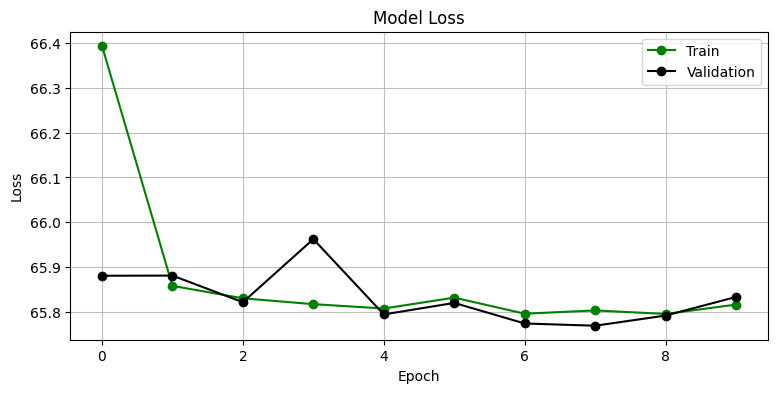

In [39]:
# Visualize model train loss at each epoch
plt.figure(figsize=(9,4))

# Plot the cost function value of the training data
plt.plot(history.history['loss'], color='green', marker='o')

# Plot the cost function of the cross validation
plt.plot(history.history['val_loss'], color='black', marker='o')

# Set the attributes labels
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the model loss at each epoch
plt.grid(True, alpha=0.8 )
plt.show()

At three (3) epoch it seems it is overfitting but recovered starting at the 4th epoch onwards. 

The above graph of the model loss would stop training at about four (4) epoch where the train and validation meets. 
Although the epoch run is at 10 epoch

In [40]:
# Evaluate the network
history=model.fit(X_train_scaled, y_train,\
                  validation_split=0.2,\
                  batch_size=batch_size,\
                  epochs=3,\
                  callbacks=[tf.keras.callbacks.ReduceLROnPlateau(),\
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=3,\
                                                   restore_best_weights=True)
                            ]
                 )

Epoch 1/3
19200/19200 [==============================] - 25s 1ms/step - loss: 65.7956 - accuracy: 0.6590 - val_loss: 65.8637 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 2/3
19200/19200 [==============================] - 28s 1ms/step - loss: 65.7920 - accuracy: 0.6590 - val_loss: 65.7888 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 3/3
19200/19200 [==============================] - 32s 2ms/step - loss: 65.7986 - accuracy: 0.6590 - val_loss: 65.8739 - val_accuracy: 0.6592 - lr: 0.0010


In [41]:
# Assign to a variable the result of the model evaluation
eval_2 = model.evaluate(X_test_scaled,y_test)

# Print out the model evalution accuracy and loss
print(f"Model's test accuracy {(eval_2[1]*100):0.02f} %")
print(f"Model's loss accuracy {(eval_2[0]):0.02f}\n")

# Assign to a variable the train accuracy
train_accuracy = history.history["accuracy"][-1]

# Print out the model evalution accuracy
print(f"Model's train accuracy {(train_accuracy*100):0.02f} %")

18750/18750 [==============================] - 21s 1ms/step - loss: 21.0751 - accuracy: 0.6586
Model's test accuracy 65.86 %
Model's loss accuracy 21.08

Model's train accuracy 65.90 %


At three (3) epochs is almost the same with running at ten (10) epochs. 

[Back to top](#Top)

<a id='sect_4'></a>

### 4. Hyperparameter tuning

**Hyperparameter** are machine models external configuration variables to manage training a model. They are sometimes called **"model hyperpameters".** The <u>parameters of machine learning models are different from hyperparameter.</u> Parameter are internal and automatically derived during the learning process and <u>not set by data scientist.</u> Each dataset and model needs different set of hyperparameter and run them through your model. Training a model sequentially with different sets of hyperparameters <u>can be a manual process or using several automated tuning method.</u> **Determining these requires multiple experiments.**

**How to identify optimal hyperparameters?**
Unfortunately, in my research, there are no set of guidelines or set of rules that works best. Would it be their optimal or default values. The activity of experimenting is known as **hyperparameter tuning or optimization.** 

**Why it is important and what are the tuning techniques** 
Benefits is that to better understand how weights affect the model. Adjusting and controlling model structure, function and performance allows data scientist to tweak models performance for optimal results. It is essential part of machine learning and appropriate hyperparameters is crucial for successful predicting model.

There are various tuning algorithm currently available; however the common types seen or used are the **Bayesian optimization**, **Grid Search** and **Randomize search**.

For this I will use the **Grid Search**

In [42]:
# Import the Grid Search 
from sklearn.model_selection import GridSearchCV

#  Import the pipeline module
from sklearn.pipeline import Pipeline

# Import the cross validation
from sklearn.model_selection import StratifiedKFold

**Cross validation** is a resampling method that uses different portions of the data to test and train a model on different iteration. Goal of which how accurately a predictive model will perform in practice. That a model ability to predict new data that was not used in estimating it in order to flag problems like overfitting or selection bias and give an insight on how the model will generalize to an independent dataset (e.g unknown dataset)

**Stratified k-fold** is a variant of the k-fold family. **Stratified sampling** is a technique <u>where samples are selected in the same proportion by dividing into groups called **strata** as appeared in the data population set.</u> Implementing these concept of **stratified sampling in cross-validation** <u>ensures the training and test sets have the same proportion of the features of interest as in the original dataset.</u> With such the **target variable (Serverity rating)** <u>ensures that the cross-validation results is a close approximation of generalization error.</u>

[StratifiedKFold picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png)

In [43]:
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [44]:
# estimators for the Grid Search
estimators = [
    ('scaling', StandardScaler()),
    ('model', DecisionTreeClassifier())   
]

# Define the parameters for the Grid Search
params = { 
    'model__max_depth': [5, 7, 10],
    'model__min_samples_leaf': [2, 3, 4, 5],
}


# Instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

In [45]:
# Instantiate the cross-validation grid search with the steps stated above
grid = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    # error_score='raise',
    n_jobs = -1, # Will force python to use all of the CPU cores on the machine enabling parallelization to speed ups the fitting process
    cv = kfold,
    verbose = 1,
)

In [46]:
# Model fitting
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 7, 10],
                         'model__min_samples_leaf': [2, 3, 4, 5]},
             verbose=1)

In [47]:
print(grid.best_estimator_)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2))])


#### Note: 
**Initially planned to Grid search the XGBoost;** however, it is taking time and computational resources. 
Below is the linked I should have followed to address the class imbalance. Also from XGBoost parameters to tuning imbalance dataset.
Since almost all the model are <u>close in their train-test score I decided to use the</u> **DecisionTreeClassifier**

Reference:

[Rules For Correctly Applying The K-Fold Cross Validation On An Imbalanced Class Distribution Model](https://medium.com/analytics-vidhya/how-to-carry-out-k-fold-cross-validation-on-an-imbalanced-classification-problem-6d3d942a8016)

[XGBoost notes on Parameter Tuning (Handle imbalance Dataset)](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html)

In [48]:
# 1. Instantiate the decision stump and fit the model with the 'grid.best_estimators' values given
DT_model = DecisionTreeClassifier( max_depth=10, 
                                   splitter="best", 
                                   min_samples_split=2, 
                                   random_state=42)

# Check if properly instatiated and proper estimator are established
DT_model

# 2. Fit the model
DT_model.fit (X_train_scaled, y_train)

# 3. Print score
# train data score
print(f"The Decision Tree train classification accuracy is:  {(DT_model.score(X_train_scaled, y_train)*100):0.2f} %")

# test data score
print(f"The Decision Tree test classification accuracy is:   {(DT_model.score(X_test_scaled, y_test)*100):0.2f} %")

The Decision Tree train classification accuracy is:  65.91 %
The Decision Tree test classification accuracy is:   65.87 %


The model improved only by 0.01% on the base DecisionTreeClassifier train-test score. It just even matched the XGBoost results 

However, I think if I have the more computer capability hyperparameter the XGBoost give also give a better improved scores.

[Back to top](#Top)

<a id='sect_5'></a>

### 5. ROC and AUC

**Receiving Operating Characteristic (ROC)** curves are measure of a classifier's predictive quality and compares and visualizes the trade off between models sensitivity and specificity.

Another metric is **Area under the Curve** which is a <u>computational relationship between false positive and true positives.</u> **The higher the AUC the better the model generally is.** However, **it is also important to inspect the curve steepness** as this <u>describes the maximization of the true positive while minimizing the false positive rate.</u>

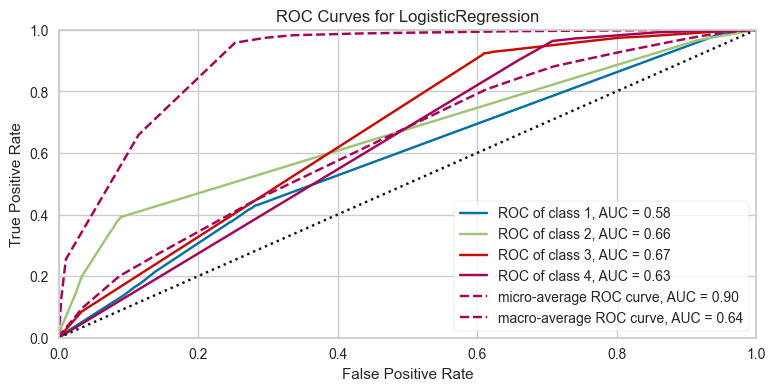

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
# Import the ROC and AUC from yellowbrick
from yellowbrick.classifier import ROCAUC

# visualize the ROC and AUC
plt.figure(figsize=(9, 4))
visualizer = ROCAUC(logistic_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)  

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test) 

# Finalize and show the figure
visualizer.show()                    

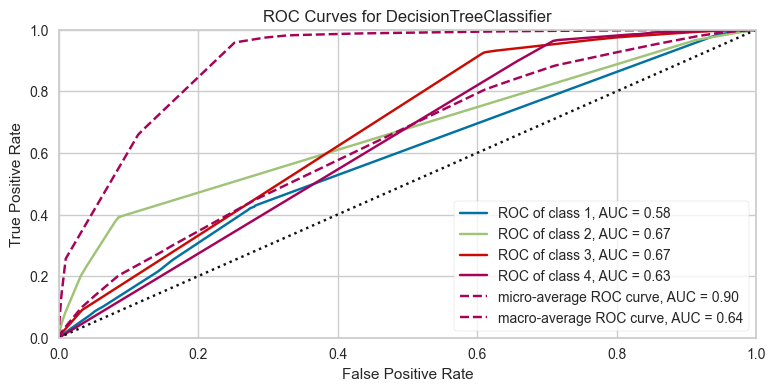

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
# Import the ROC and AUC from yellowbrick
from yellowbrick.classifier import ROCAUC

# visualize the ROC and AUC
plt.figure(figsize=(9, 4))
visualizer = ROCAUC(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)  

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test) 

# Finalize and show the figure
visualizer.show()        

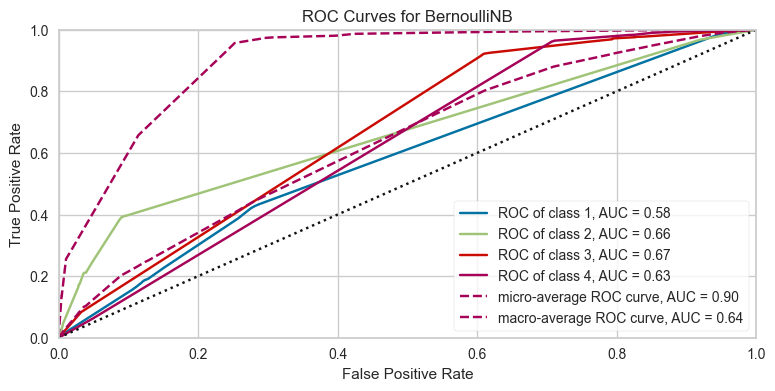

<Axes: title={'center': 'ROC Curves for BernoulliNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
# Import the ROC and AUC from yellowbrick
from yellowbrick.classifier import ROCAUC

# visualize the ROC and AUC
plt.figure(figsize=(9, 4))
visualizer = ROCAUC(BernoulliNB_clf)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)  

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test) 

# Finalize and show the figure
visualizer.show()  

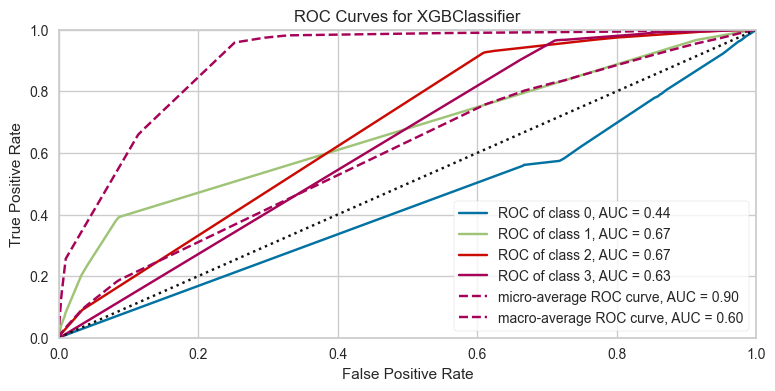

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
# Import the ROC and AUC from yellowbrick
from yellowbrick.classifier import ROCAUC

# visualize the ROC and AUC
plt.figure(figsize=(9, 4))
visualizer = ROCAUC(xgbCls_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)  

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test) 

# Finalize and show the figure
visualizer.show()  

**The result of all the tried model** <u>have nearly identical train and test score.</u> **And train-test score are so close that indicate there is very little sign of overfitting.**

The ROC class 1 -4 AUC <u>roughly averaging about **0.64**.</u>

The **micro average** which is the <u>sum of all true positives and false positives across all classes are high (0.90).</u>

The **macro average** is the<u>average of curves across all classes about 0.64</u>

<u>Since almost all the above said models are identical in result</u> **I will just see the precision, recall and f1-score of the XGBoost.**

Also to see the **top 10 indicative and less indicative features.**

In [53]:
# make predictions of the XGBoost model
xgbCls_prediction = xgbCls_model.predict(X_test_scaled)

# Import the classfication report module
from sklearn.metrics import classification_report

report_initial = classification_report(y_test_le, 
                                       xgbCls_prediction, 
                                       zero_division=0.0, 
                                       target_names=['1', '2', '3', '4'])

# Print out the precision / recall and f1-score
print(report_initial)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7787
           2       0.66      0.97      0.79    390500
           3       0.57      0.09      0.16    198939
           4       0.00      0.00      0.00      2774

    accuracy                           0.66    600000
   macro avg       0.31      0.26      0.24    600000
weighted avg       0.62      0.66      0.56    600000



Looking the the precision and recall that it is only predicting on the Severity 2 and 3 only. Due to Severity 2 and 3 are highly imbalanced.

In [54]:
# Print score
# train data score
print(f"The XGBoost train classification accuracy is:  {(xgbCls_model.score(X_train_scaled, y_train_le)*100):0.2f} %")

# test data score
print(f"The XGBoost test classification accuracy is:   {(xgbCls_model.score(X_test_scaled, y_test_le)*100):0.2f} %")

The XGBoost train classification accuracy is:  65.90 %
The XGBoost test classification accuracy is:   65.87 %


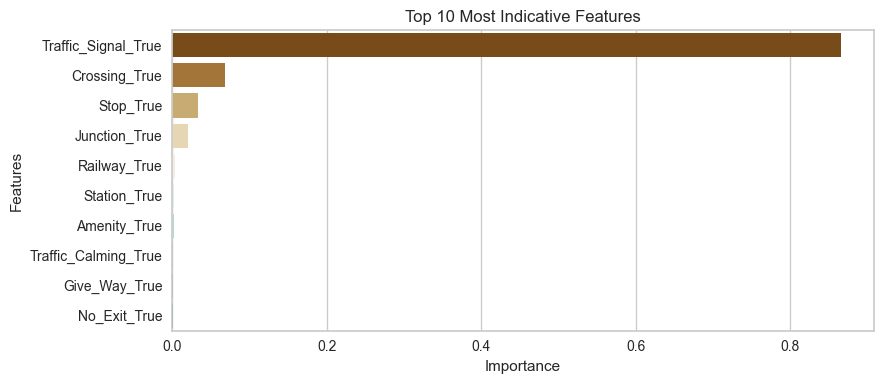

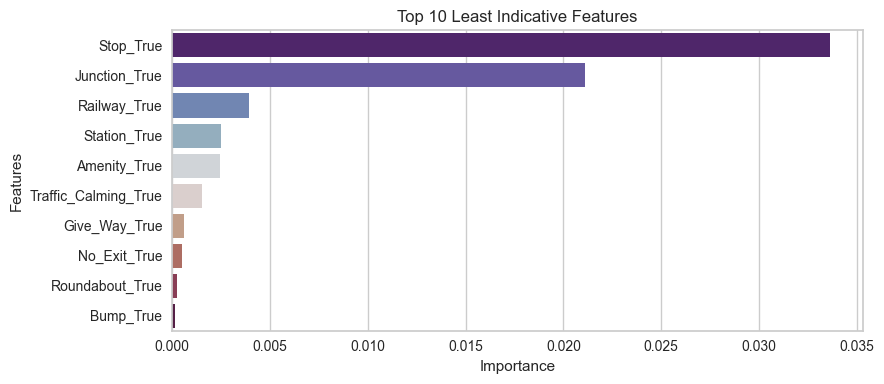

In [55]:
# Assign to a variable the XGBoost feature importance
feature_importances = xgbCls_model.feature_importances_

# Assign to a variable the features
feature_names = X.columns

# Create a DataFrame for feature importances for visualization
importance_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set figure size for the indicative features
plt.figure(figsize=(9, 4))

# Most indicative features
sns.barplot(data=importance_df.head(10), x='Importance', y='Features', palette='BrBG')
plt.title('Top 10 Most Indicative Features')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the bar plot of most indicative features
plt.tight_layout()
plt.show()

# Set the figure size for the least indicative features
plt.figure(figsize=(9, 4))

# Least indicative features
sns.barplot(data=importance_df.tail(10), x='Importance', y='Features', palette='twilight_shifted')
plt.title('Top 10 Least Indicative Features')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the bar plot of the least indicative features
plt.tight_layout()
plt.show()

Traffic signal is the top indicative feature while the Stop is the least one.

[Back to top](#Top)

<a id='sect_6'></a>

### 6. Conclusion

In the feature analysis the result are unusual. After doing the preprocessing again I realise that there is high collinearity when I created a new feature getting the severity rating for each road feature. <u>That new created feature is good getting the counts of each road feature severity rating.</u> So I did use the pandas get dummy function in preprocessing.

**Here we tested four (4) supervised and one (1) deeplearning machine models.** The results for me is quite surprising that neither showed to be the best model. All train-test score are closed between models. During extensive research of each different models there is no set rules or guidelines for choosing the perfect parameters. **As I read in the XGBoost, parameter tuning is a "dark art" in machine learning.** Doing multiple experiments so thus I think as called to be as **Data Scientist**. 

The tensor flow is the most challenging that I tried. As it is difficult to formulate and understanding how it works. Several research and reading I did on this one. And why it is called **"black box"** because it need a deep understanding of the domain and the problem it needs to address.

Another challenge is doing the Grid Search. I was trying it for the XGBoost unfortunately it is consuming alot of time and computer resources. Just to perform this I choose the second best model which is the Decision Tree classifier. Although again neither models is a run away winner.

Result or prediction are mostly centered to Severity 2 and 3. Due to the fact they are the majority class and the data is highly imbalance. Severity 2 precision is 0.66, recall at 0.97 and f1-score at 0.79. Severity 3 precision is 0.57, recall at 0.09 and f1-score at 0.16. While Severity 1 and 4 are zero (0). I was thinking of lumping together 1 and 2 as "moderate severity" and 3 and 4 as "severe". 

In my opinion the precision would be good enough. **The purpose of this is to predict which road features would cause a high severity. Because we can study and improve the road features. Unlike weather, temperature and alike; that is sometimes beyond human contol. We can also concentrate resources to highly severe accident road conditions.** We could improve this prediction by adding more data like which state, county and city. As these would be different due to several factors.

[Back to top](#Top)

### End